In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
iris_data = pd.read_csv(r'C:\pyml_scripts\iris\iris-data.csv', na_values=['NA'] ) 

In [3]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


In [4]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


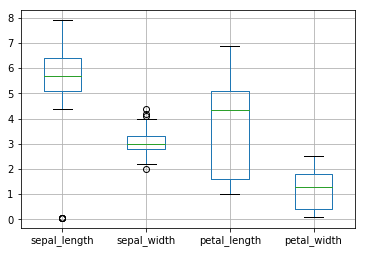

In [5]:
iris_data.boxplot()

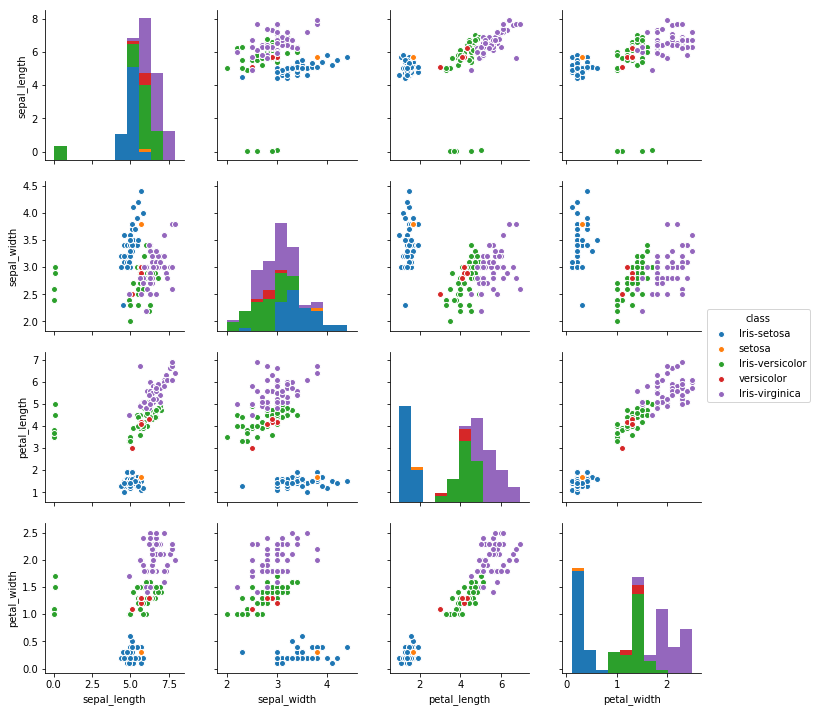

In [6]:
#hue參數可以帶入類別欄位,每個類別將以不同顏色繪製
sns.pairplot(iris_data.dropna(),hue='class') 

In [7]:
iris_data['class'].unique()

array(['Iris-setosa', 'setosa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [8]:
#修正類別名稱
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'setosa', 'class'] = 'Iris-setosa'
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

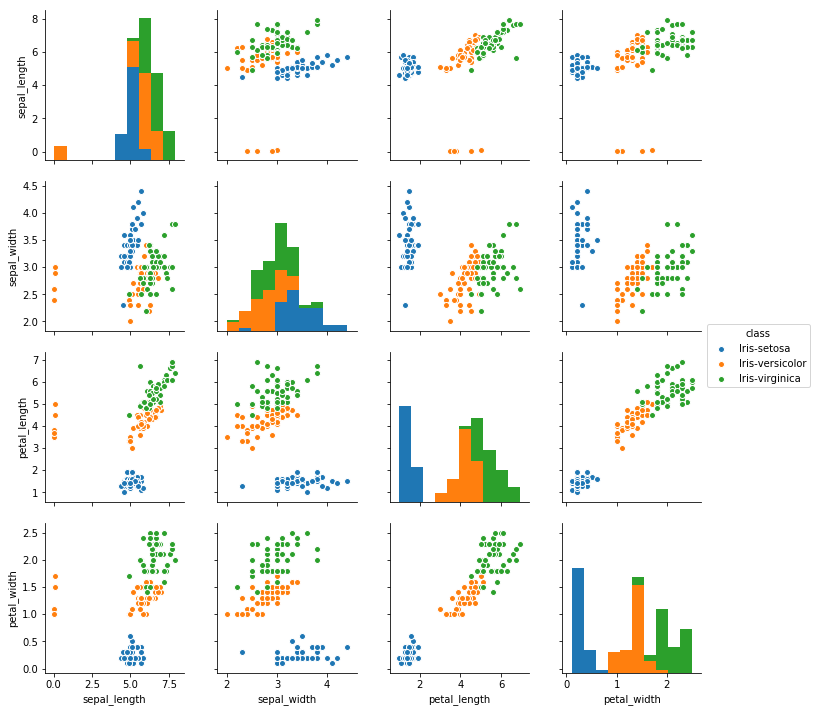

In [9]:
sns.pairplot(iris_data.dropna(),hue='class')

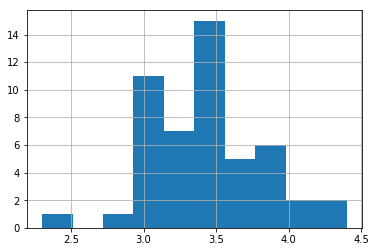

In [10]:
iris_data.loc[iris_data['class'] == 'Iris-setosa','sepal_width'].hist()

In [11]:
#找出異常的花萼寬度的樣本(Iris-setosa的花萼不可能小於2.5公分)
cond = (iris_data['class'] == 'Iris-setosa') & (iris_data['sepal_width'] < 2.5)
iris_data.loc[cond]

,sepal_length,sepal_width,petal_length,petal_width,class
41,4.5,2.3,1.3,0.3,Iris-setosa


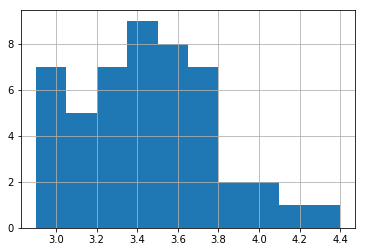

In [12]:
#因為錯誤筆數少,所以直接刪除錯誤資料(花萼寬度小於2.5公分)
iris_data = iris_data.loc[~cond]

#檢視是否已經移除錯誤資料
iris_data.loc[iris_data['class'] == 'Iris-setosa','sepal_width'].hist()

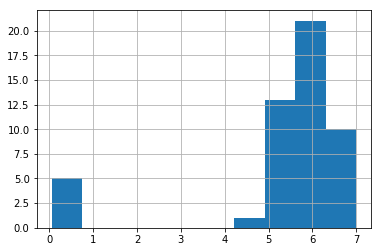

In [13]:
#花萼長度也有些異常資料
iris_data.loc[cond, 'sepal_length'] *= 100.0
iris_data.loc[iris_data['class'] == 'Iris-versicolor','sepal_length'].hist()

In [14]:
cond = (iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length'] < 1.0)
iris_data.loc[cond]

,sepal_length,sepal_width,petal_length,petal_width,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


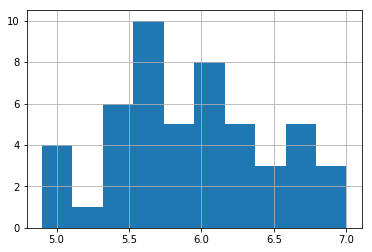

In [15]:
#此處發現似乎是小數點點錯位置,與其他資料差兩位數.原因可能是將使用公尺當作單位,正確單位應該為公分
iris_data.loc[cond, 'sepal_length'] *= 100.0
iris_data.loc[iris_data['class'] == 'Iris-versicolor','sepal_length'].hist()

In [16]:
#找出有空值的資料
iris_data.loc[(iris_data['sepal_length'].isnull())|
              (iris_data['sepal_width'].isnull())|
              (iris_data['petal_length'].isnull())|
              (iris_data['petal_width'].isnull())]

,sepal_length,sepal_width,petal_length,petal_width,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [17]:
#因為空值都來自於Iris-setosa類別的petal_width_cm欄位且只有5筆,所以採用均值代替原本的空值
Setosa = iris_data['class'] == 'Iris-setosa'
avg_petal_width = iris_data.loc[Setosa, 'petal_width'].mean()
iris_data.loc[Setosa & (iris_data['petal_width'].isnull()), 'petal_width'] = avg_petal_width
iris_data.loc[Setosa & (iris_data['petal_width'] == avg_petal_width)]

,sepal_length,sepal_width,petal_length,petal_width,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [18]:
#驗證是否已經消除空值
iris_data.loc[(iris_data['sepal_length'].isnull())|
              (iris_data['sepal_width'].isnull())|
              (iris_data['petal_length'].isnull())|
              (iris_data['petal_width'].isnull())]

,sepal_length,sepal_width,petal_length,petal_width,class


In [19]:
sns.set(style='ticks')

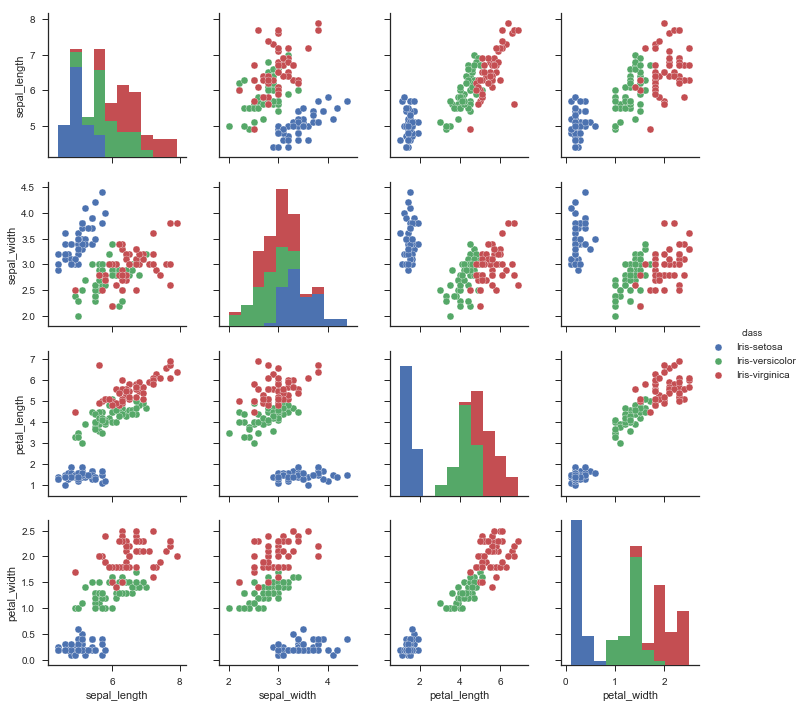

In [20]:
#類別為3種,異常值與空值已經處理
sns.pairplot( iris_data, hue='class' );

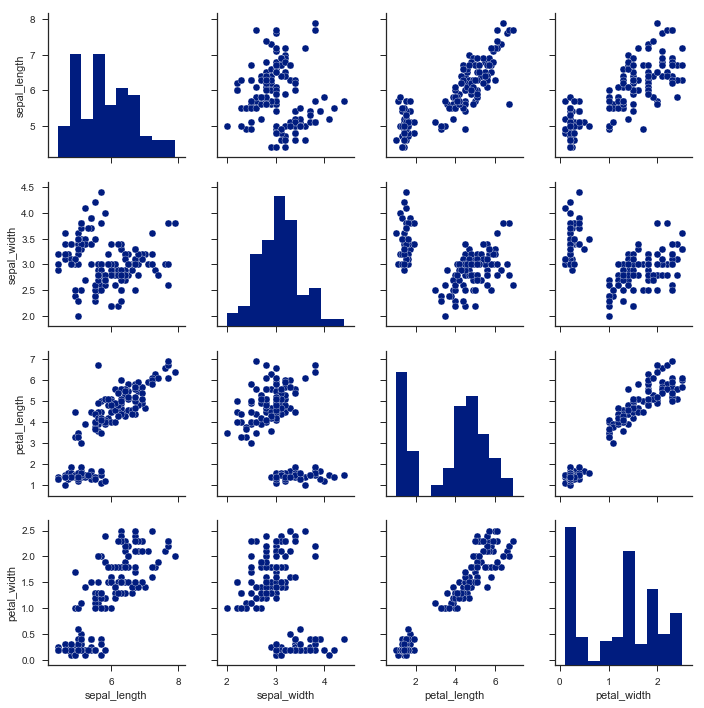

In [21]:
#如果資料集沒有類別欄位可供使用,則不要加上hue參數,此時圖表也將以單色繪製
sns.set_style('ticks')
sns.set_palette('dark')
sns.pairplot( iris_data);

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


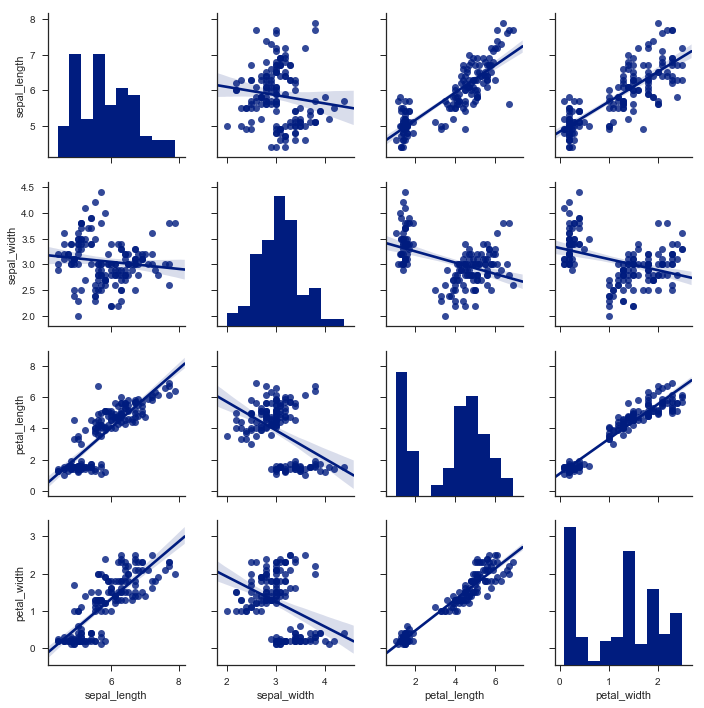

In [22]:
sns.set_style('ticks')
sns.set_palette('dark')
sns.pairplot( iris_data, kind='reg' );

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


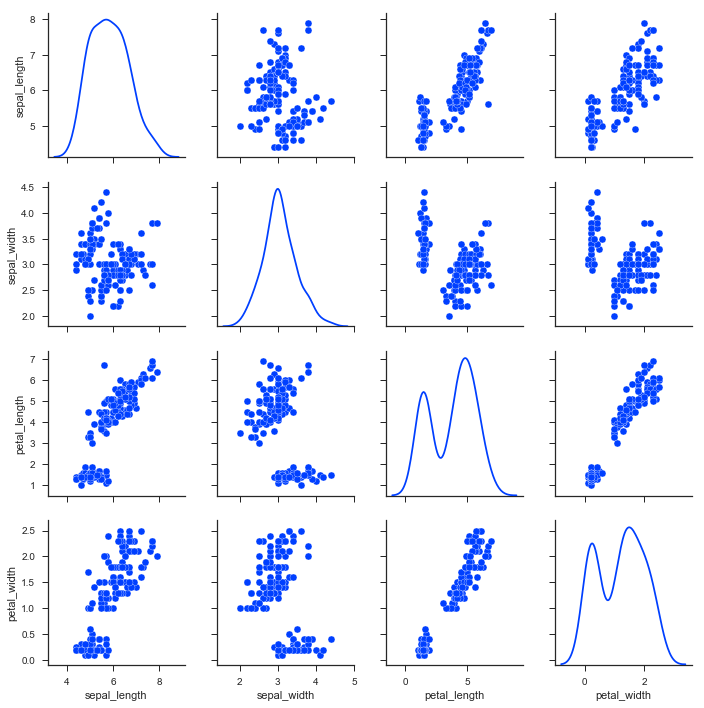

In [23]:
sns.set_palette('bright')
sns.pairplot( iris_data, diag_kind='kde' );

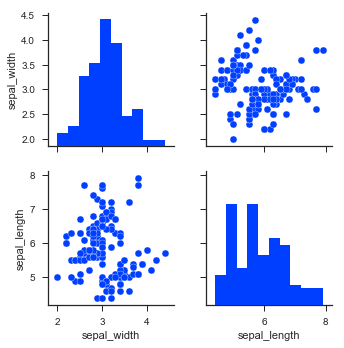

In [24]:
#僅使用部分欄位繪製
sns.pairplot(iris_data,vars=['sepal_width','sepal_length'])

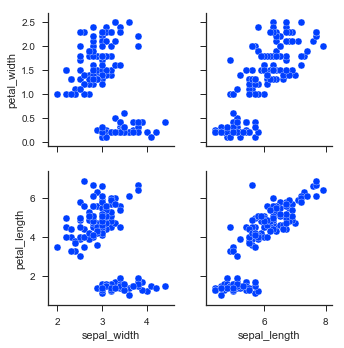

In [25]:
#明確指定x,y軸
sns.pairplot(iris_data,x_vars=['sepal_width','sepal_length'],
                       y_vars=['petal_width','petal_length'])

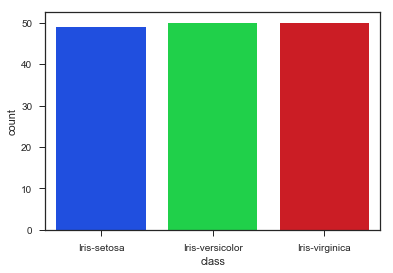

In [26]:
sns.countplot(x='class',data=iris_data)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


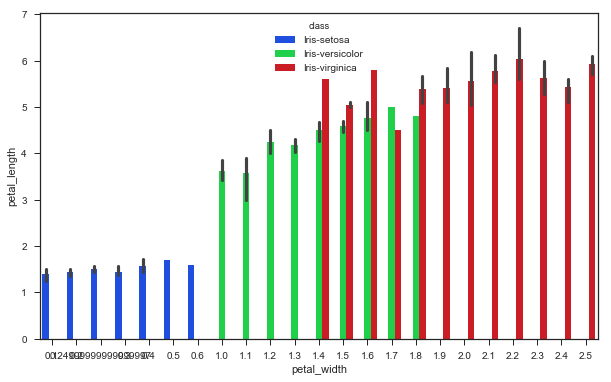

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='petal_width',y='petal_length',hue='class',data=iris_data)

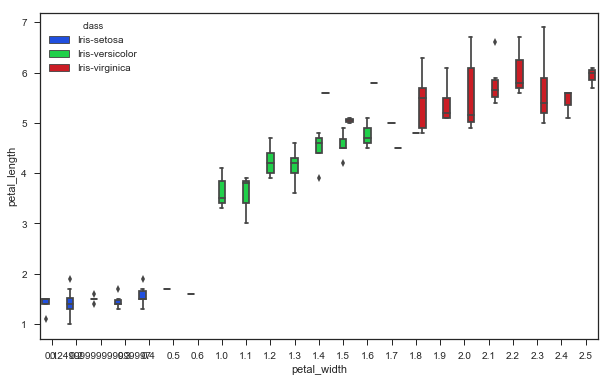

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='petal_width',y='petal_length',hue='class',data=iris_data)

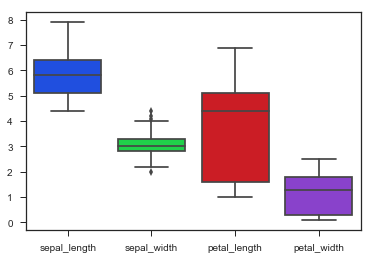

In [29]:
sns.boxplot(data=iris_data)

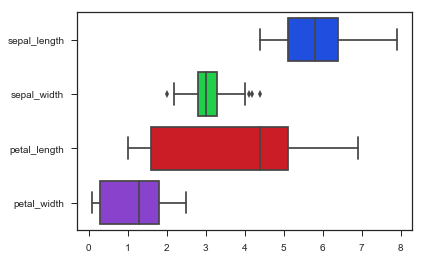

In [30]:
sns.boxplot(data=iris_data,orient='h')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


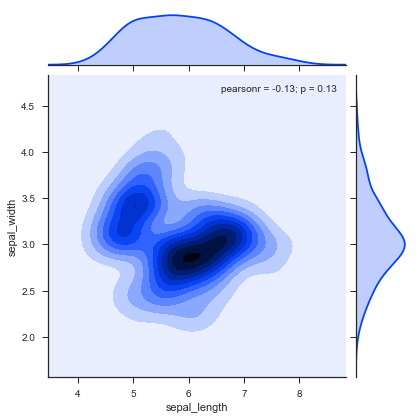

In [31]:
sns.jointplot(x='sepal_length',y='sepal_width',data=iris_data,kind='kde')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


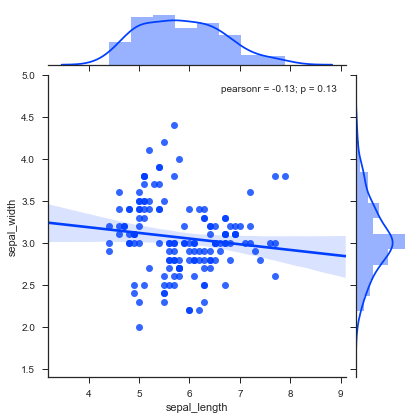

In [32]:
sns.jointplot(x='sepal_length',y='sepal_width',data=iris_data,kind='reg')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


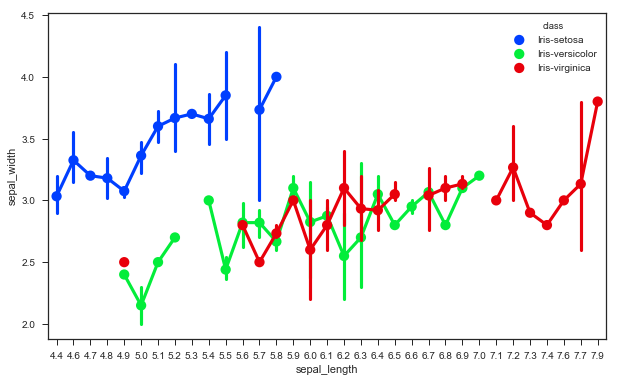

In [33]:
plt.figure(figsize=(10,6))
sns.pointplot(x='sepal_length',y='sepal_width',hue='class',data=iris_data)